# Initialization

## Load

In [ ]:
import os
import sys

sys.path.append("../")  # go to parent dir
DATA_SRC = os.path.join("..", "Data")

data_analysis = 23


In [ ]:
from utils.common import CustomDataFrame

path = os.path.join(DATA_SRC, "CSV", "train.csv")

data_df = CustomDataFrame(
    [path],
    index_col="id",
    target_cols=["sii"],
    no_null_cols=["sii"],
)


# Calcula el porcentaje de valores nulos por columna
nulls_info_load_ = data_df.null_percent()


| Total Rows: 3,960 | Rows with Nulls: 3,960 | Total Nulls: 131,717 | Nulls per Row: 33.26 | 


alt.Chart(...)

# Clean Data

### Remove Nulls (Columns/Rows)

In [ ]:
from utils.common import Show

data_df = data_df.clean_nulls(0.5, show=Show.PLOT)
after_auto_clean_ = data_df.dataframe
display(after_auto_clean_)


Original Null Percentage
----------------------
| Total Rows: 3,960 | Rows with Nulls: 3,960 | Total Nulls: 131,717 | Nulls per Row: 33.26 | 


alt.Chart(...)

----------------------

After Dropping Rows with Null Values on NO_NULL_COLUMNS:
----------------------
['sii']
| Total Rows: 2,736 | Rows with Nulls: 2,736 | Total Nulls: 51,809 | Nulls per Row: 18.94 | 


alt.Chart(...)

----------------------

Columns to Drop due to Null Percentage | thresshold=50% |
----------------------
['Fitness_Endurance-Season', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'Physical-Waist_Circumference', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total']
| Total Rows: 2,736 | Rows with Nulls: 2,070 | Total Nulls: 29,840 | Nulls per Row: 14.42 | 


alt.Chart(...)

----------------------



id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
str,str,i64,i64,str,i64,str,f64,f64,f64,i64,i64,i64,str,i64,i64,i64,i64,f64,i64,f64,i64,f64,i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,str,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,str,i64,i64
"""00008ff9""","""Fall""",5,0,"""Winter""",51,"""Fall""",16.877316,46.0,50.8,null,null,null,"""Fall""",0,0,0,0,7.0,0,6.0,0,6.0,1,"""Fall""",2,2.66855,16.8792,932.498,1492.0,8.25598,41.5862,13.8177,3.06143,9.21377,1,24.4349,8.89536,38.9177,19.5413,32.6909,null,null,"""Fall""",5,4,4,0,4,0,0,4,0,0,4,0,4,4,4,4,4,4,2,4,55,null,null,null,"""Fall""",3,2
"""000fd460""","""Summer""",9,0,null,null,"""Fall""",14.03559,48.0,46.0,75,70,122,"""Fall""",3,0,5,0,11.0,1,11.0,1,3.0,0,"""Winter""",2,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1,21.0352,14.974,39.4497,15.4107,27.0552,"""Fall""",2.34,"""Fall""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Fall""",46,64,"""Summer""",0,0
"""00105258""","""Summer""",10,1,"""Fall""",71,"""Fall""",16.648696,56.5,75.6,65,94,117,"""Fall""",20,1,7,1,10.0,1,10.0,1,5.0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Summer""",2.17,"""Fall""",5,2,2,1,2,1,1,2,1,1,1,0,1,1,1,0,2,2,1,1,28,"""Fall""",38,54,"""Summer""",2,0
"""00115b9f""","""Winter""",9,0,"""Fall""",71,"""Summer""",18.292347,56.0,81.6,60,97,117,"""Summer""",18,1,5,0,7.0,0,7.0,0,7.0,1,"""Summer""",3,3.84191,18.2943,1131.43,1923.44,15.5925,62.7757,14.074,4.22033,18.8243,2,30.4041,16.779,58.9338,26.4798,45.9966,"""Winter""",2.451,"""Summer""",4,2,4,0,5,1,0,3,2,2,3,0,3,0,0,3,4,3,4,1,44,"""Summer""",31,45,"""Winter""",0,1
"""001f3379""","""Spring""",13,1,"""Winter""",50,"""Summer""",22.279952,59.5,112.2,60,73,102,"""Summer""",12,0,6,0,10.0,1,11.0,1,8.0,0,"""Summer""",2,4.33036,30.1865,1330.97,1996.45,30.2124,84.0285,16.6877,13.4988,67.9715,2,32.9141,20.902,79.6982,35.3804,63.1265,"""Spring""",4.11,"""Summer""",3,3,3,0,2,1,0,2,2,1,0,1,3,3,2,1,3,1,2,1,34,"""Summer""",40,56,"""Spring""",0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ff6c2bb8""","""Fall""",8,0,null,null,"""Fall""",17.13981,52.5,67.2,60,65,112,"""Fall""",0,0,0,0,8.0,1,10.0,1,12.0,1,"""Fall""",3,3.20303,17.1417,1035.27,1759.96,11.0063,52.5331,13.4004,3.7413,14.6669,1,25.7118,15.815,49.3301,20.2645,36.7181,"""Fall""",3.44,"""Fall""",3,3,3,0,0,0,0,3,0,0,0,0,2,0,0,3,0,2,2,1,22,"""Fall""",41,58,"""Fall""",2,0
"""ff759544""","""Summer""",7,1,null,null,"""Summer""",13.927006,48.5,46.6,65,75,105,"""Summer""",0,0,0,0,9.0,0,8.5,0,4.5,0,"""Fall""",1,2.3668,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.4147,1,20.0572,15.14,42.8185,18.0937,30.0453,null,null,"""Summer""",1,3,3,0,3,0,0,0,0,0,3,0,5,1,0,5,3,3,3,0,33,"""Summer""",48,67,"""Summer""",0,1
"""ff8a2de4""","""Fall""",13,0,"""Spring""",60,"""Fall""",16.

### Manual Remove Columns

In [ ]:
from pprint import pprint

drop_columns = [
    # LEKEA EL TARGET
    "PCIAT-PCIAT_Total",
    "PCIAT-PCIAT_01",
    "PCIAT-PCIAT_02",
    "PCIAT-PCIAT_03",
    "PCIAT-PCIAT_04",
    "PCIAT-PCIAT_05",
    "PCIAT-PCIAT_06",
    "PCIAT-PCIAT_07",
    "PCIAT-PCIAT_08",
    "PCIAT-PCIAT_09",
    "PCIAT-PCIAT_10",
    "PCIAT-PCIAT_11",
    "PCIAT-PCIAT_12",
    "PCIAT-PCIAT_13",
    "PCIAT-PCIAT_14",
    "PCIAT-PCIAT_15",
    "PCIAT-PCIAT_16",
    "PCIAT-PCIAT_17",
    "PCIAT-PCIAT_18",
    "PCIAT-PCIAT_19",
    "PCIAT-PCIAT_20",
]
#  display(data.dataframe.columns)

print(f"Columns Count BEFORE DROP: {len(data_df.dataframe.columns)}")
data_df.dataframe = data_df.dataframe.drop([
    col for col in drop_columns if col in data_df.dataframe.columns
])

print(f"Columns Count AFTER DROP: {len(data_df.dataframe.columns)}")
print()

print(f"Data Shape: {data_df.dataframe.shape}")
print("Data Columns:")
pprint(data_df.dataframe.columns)

data_df.null_percent()

data_null_cols_clean_ = data_df.dataframe
display(data_null_cols_clean_)


Columns Count BEFORE DROP: 71
Columns Count AFTER DROP: 50

Data Shape: (2736, 50)
Data Columns:
['id',
 'Basic_Demos-Enroll_Season',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-Season',
 'CGAS-CGAS_Score',
 'Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'FGC-Season',
 'FGC-FGC_CU',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_PU',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL',
 'FGC-FGC_TL_Zone',
 'BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_C-Season',
 'PAQ_C-PAQ_C_Total',
 'PCIAT-Season',
 'SDS-Season',
 'SDS-SDS_Total_Raw',
 'SDS-SDS_Total_T',
 'PreInt_EduHx-Season',
 'PreInt_EduHx-

alt.Chart(...)

id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
str,str,i64,i64,str,i64,str,f64,f64,f64,i64,i64,i64,str,i64,i64,i64,i64,f64,i64,f64,i64,f64,i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,str,f64,str,str,i64,i64,str,i64,i64
"""00008ff9""","""Fall""",5,0,"""Winter""",51,"""Fall""",16.877316,46.0,50.8,null,null,null,"""Fall""",0,0,0,0,7.0,0,6.0,0,6.0,1,"""Fall""",2,2.66855,16.8792,932.498,1492.0,8.25598,41.5862,13.8177,3.06143,9.21377,1,24.4349,8.89536,38.9177,19.5413,32.6909,null,null,"""Fall""",null,null,null,"""Fall""",3,2
"""000fd460""","""Summer""",9,0,null,null,"""Fall""",14.03559,48.0,46.0,75,70,122,"""Fall""",3,0,5,0,11.0,1,11.0,1,3.0,0,"""Winter""",2,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1,21.0352,14.974,39.4497,15.4107,27.0552,"""Fall""",2.34,"""Fall""","""Fall""",46,64,"""Summer""",0,0
"""00105258""","""Summer""",10,1,"""Fall""",71,"""Fall""",16.648696,56.5,75.6,65,94,117,"""Fall""",20,1,7,1,10.0,1,10.0,1,5.0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Summer""",2.17,"""Fall""","""Fall""",38,54,"""Summer""",2,0
"""00115b9f""","""Winter""",9,0,"""Fall""",71,"""Summer""",18.292347,56.0,81.6,60,97,117,"""Summer""",18,1,5,0,7.0,0,7.0,0,7.0,1,"""Summer""",3,3.84191,18.2943,1131.43,1923.44,15.5925,62.7757,14.074,4.22033,18.8243,2,30.4041,16.779,58.9338,26.4798,45.9966,"""Winter""",2.451,"""Summer""","""Summer""",31,45,"""Winter""",0,1
"""001f3379""","""Spring""",13,1,"""Winter""",50,"""Summer""",22.279952,59.5,112.2,60,73,102,"""Summer""",12,0,6,0,10.0,1,11.0,1,8.0,0,"""Summer""",2,4.33036,30.1865,1330.97,1996.45,30.2124,84.0285,16.6877,13.4988,67.9715,2,32.9141,20.902,79.6982,35.3804,63.1265,"""Spring""",4.11,"""Summer""","""Summer""",40,56,"""Spring""",0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ff6c2bb8""","""Fall""",8,0,null,null,"""Fall""",17.13981,52.5,67.2,60,65,112,"""Fall""",0,0,0,0,8.0,1,10.0,1,12.0,1,"""Fall""",3,3.20303,17.1417,1035.27,1759.96,11.0063,52.5331,13.4004,3.7413,14.6669,1,25.7118,15.815,49.3301,20.2645,36.7181,"""Fall""",3.44,"""Fall""","""Fall""",41,58,"""Fall""",2,0
"""ff759544""","""Summer""",7,1,null,null,"""Summer""",13.927006,48.5,46.6,65,75,105,"""Summer""",0,0,0,0,9.0,0,8.5,0,4.5,0,"""Fall""",1,2.3668,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.4147,1,20.0572,15.14,42.8185,18.0937,30.0453,null,null,"""Summer""","""Summer""",48,67,"""Summer""",0,1
"""ff8a2de4""","""Fall""",13,0,"""Spring""",60,"""Fall""",16.36246,59.5,82.4,71,70,104,"""Fall""",16,0,10,1,8.0,1,9.0,1,12.0,1,"""Fall""",3,4.52277,16.3642,1206.88,2051.7,19.4611,70.8117,14.0629,2.30138,11.5883,1,33.3709,17.9797,66.2889,29.779,52.832,"""Winter""",3.26,"""Winter""","""Winter""",35,50,"""Fall""",1,1


### Convert Columns

In [ ]:
import polars as pl
import polars.selectors as cs

from utils.transform import date_to_cyclic

data_df.column_distribution("sii")
display(data_df["sii"].unique().sort())

ciclyc_date_columns = []
for col in ciclyc_date_columns:
    if col not in data_df.dataframe.columns:
        continue
    if data_df.dataframe[col].dtype == pl.String:
        data_df.dataframe = data_df.dataframe.with_columns(pl.col(col).str.to_datetime())
    data_df.dataframe = date_to_cyclic(data_df.dataframe, col, fill_nan=False)

print("String Columns:", data_df.get_columns_types().get(pl.String))


non_str_categories_columns = []
for col in non_str_categories_columns:
    data_df.with_columns(pl.col(col).cast(pl.String))

data_df.with_columns(cs.string().cast(pl.Categorical))
new_types = data_df.get_columns_types()
print("New Types: ")
pprint(new_types)
if True:
    dummy_vars: list[str] = []
    dummy_vars += new_types.get(pl.Categorical("physical"), [])
    dummy_vars += new_types.get(pl.Categorical("lexical"), [])
    dummy_vars = [col for col in dummy_vars if col not in data_df.target_cols]

    data_df.dataframe = data_df.dataframe.to_dummies(dummy_vars, drop_first=True)

    after_dummies_ = data_df.dataframe
    display(after_dummies_)


alt.Chart(...)

sii
i64
0
1
2
3


Data Types: {String: 9, Int64: 19, Float64: 21}
String Columns: ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'FGC-Season', 'BIA-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
Data Types: {Categorical(ordering='physical'): 9, Int64: 19, Float64: 21}
New Types: 
{Categorical(ordering='physical'): ['Basic_Demos-Enroll_Season',
                                    'CGAS-Season',
                                    'Physical-Season',
                                    'FGC-Season',
                                    'BIA-Season',
                                    'PAQ_C-Season',
                                    'PCIAT-Season',
                                    'SDS-Season',
                                    'PreInt_EduHx-Season'],
 Float64: ['Physical-BMI',
           'Physical-Height',
           'Physical-Weight',
           'FGC-FGC_SRL',
           'FGC-FGC_SRR',
           'FGC-FGC_TL',
           'BIA-BIA_BMC',
           'BI

/home/mili/Documentos/Programacion/MIOTI/MIOTI_DS_ProyectoFinal/scripts/../utils/common.py:317: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  dataframe = self.dataframe.with_columns(*exprs, *named_exprs)


id,Basic_Demos-Enroll_Season_Spring,Basic_Demos-Enroll_Season_Summer,Basic_Demos-Enroll_Season_Winter,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season_Fall,CGAS-Season_Spring,CGAS-Season_Summer,CGAS-Season_null,CGAS-CGAS_Score,Physical-Season_Spring,Physical-Season_Summer,Physical-Season_Winter,Physical-Season_null,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season_Spring,FGC-Season_Summer,FGC-Season_Winter,FGC-Season_null,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season_Spring,BIA-Season_Summer,BIA-Season_Winter,BIA-Season_null,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season_Fall,PAQ_C-Season_Spring,PAQ_C-Season_Summer,PAQ_C-Season_Winter,PAQ_C-PAQ_C_Total,PCIAT-Season_Spring,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,PreInt_EduHx-Season_null,PreInt_EduHx-computerinternet_hoursday,sii
cat,u8,u8,u8,i64,i64,u8,u8,u8,u8,i64,u8,u8,u8,u8,f64,f64,f64,i64,i64,i64,u8,u8,u8,u8,i64,i64,i64,i64,f64,i64,f64,i64,f64,i64,u8,u8,u8,u8,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,u8,u8,u8,u8,f64,u8,u8,u8,u8,u8,u8,u8,i64,i64,u8,u8,u8,u8,i64,i64
"""00008ff9""",0,0,0,5,0,0,0,0,0,51,0,0,0,0,16.877316,46.0,50.8,null,null,null,0,0,0,0,0,0,0,0,7.0,0,6.0,0,6.0,1,0,0,0,0,2,2.66855,16.8792,932.498,1492.0,8.25598,41.5862,13.8177,3.06143,9.21377,1,24.4349,8.89536,38.9177,19.5413,32.6909,0,0,0,0,null,0,0,0,0,0,0,0,null,null,0,0,0,0,3,2
"""000fd460""",0,1,0,9,0,0,0,0,1,null,0,0,0,0,14.03559,48.0,46.0,75,70,122,0,0,0,0,3,0,5,0,11.0,1,11.0,1,3.0,0,0,0,1,0,2,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1,21.0352,14.974,39.4497,15.4107,27.0552,1,0,0,0,2.34,0,0,0,1,0,0,0,46,64,0,1,0,0,0,0
"""00105258""",0,1,0,10,1,1,0,0,0,71,0,0,0,0,16.648696,56.5,75.6,65,94,117,0,0,0,0,20,1,7,1,10.0,1,10.0,1,5.0,0,0,0,0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,1,0,2.17,0,0,0,1,0,0,0,38,54,0,1,0,0,2,0
"""00115b9f""",0,0,1,9,0,1,0,0,0,71,0,1,0,0,18.292347,56.0,81.6,60,97,117,0,1,0,0,18,1,5,0,7.0,0,7.0,0,7.0,1,0,1,0,0,3,3.84191,18.2943,1131.43,1923.44,15.5925,62.7757,14.074,4.22033,18.8243,2,30.4041,16.779,58.9338,26.4798,45.9966,0,0,0,1,2.451,0,1,0,0,0,1,0,31,45,0,0,1,0,0,1
"""001f3379""",1,0,0,13,1,0,0,0,0,50,0,1,0,0,22.279952,59.5,112.2,60,73,102,0,1,0,0,12,0,6,0,10.0,1,11.0,1,8.0,0,0,1,0,0,2,4.33036,30.1865,1330.97,1996.45,30.2124,84.0285,16.6877,13.4988,67.9715,2,32.9141,20.902,79.6982,35.3804,63.1265,0,1,0,0,4.11,0,1,0,0,0,1,0,40,56,1,0,0,0,0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ff6c2bb8""",0,0,0,8,0,0,0,0,1,null,0,0,0,0,17.13981,52.5,67.2,60,65,112,0,0,0,0,0,0,0,0,8.0,1,10.0,1,12.0,1,0,0,0,0,3,3.20303,17.1417,1035.27,1759.96,11.0063,52.5331,13.4004,3.7413,14.6669,1,25.7118,15.815,49.3301,20.2645,36.7181,1,0,0,0,3.44,0,0,0,1,0,0,0,41,58,0,0,0,0,2,0
"""ff759544""",0,1,0,7,1,0,0,0,1,null,0,1,0,0,13.927006,48.5,46.6,65,75,105,0,1,0,0,0,0,0,0,9.0,0,8.5,0,4.5,0,0,0,0,0,1,2.3668,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.4147,1,20.0572,15.14,42.8185,18.0937,30.0453,0,0,0,0,null,0,1,0,0,0,1,0,48,67,0,1,0,0,0,1
"""ff8a2de4""",0,0,0,13,0,0,1,0,0,60,0,0,0,0,16.36246,59.5,82.4,71,70,104,0,0,0,0,16,0,10,1,8.0,1,9.0,1,12.0,1,0,0,0,0,3,4.52277,16.3642,1206.88,2051.7,19.4611,70.8117,14.0629,2.30138,11.5883,1,33.3709,17.9797,66.2889,29.779,52.832,0,0,0,1,3.26,0,0,1,0,0,0,1,35,50,0,0,0,0,1,1


# Correlaciones

Basic_Demos-Enroll_Season_Spring,Basic_Demos-Enroll_Season_Summer,Basic_Demos-Enroll_Season_Winter,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season_Fall,CGAS-Season_Spring,CGAS-Season_Summer,CGAS-Season_null,CGAS-CGAS_Score,Physical-Season_Spring,Physical-Season_Summer,Physical-Season_Winter,Physical-Season_null,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season_Spring,FGC-Season_Summer,FGC-Season_Winter,FGC-Season_null,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season_Spring,BIA-Season_Summer,BIA-Season_Winter,BIA-Season_null,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season_Fall,PAQ_C-Season_Spring,PAQ_C-Season_Summer,PAQ_C-Season_Winter,PAQ_C-PAQ_C_Total,PCIAT-Season_Spring,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,PreInt_EduHx-Season_null,PreInt_EduHx-computerinternet_hoursday,sii
u8,u8,u8,i64,i64,u8,u8,u8,u8,i64,u8,u8,u8,u8,f64,f64,f64,i64,i64,i64,u8,u8,u8,u8,i64,i64,i64,i64,f64,i64,f64,i64,f64,i64,u8,u8,u8,u8,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,u8,u8,u8,u8,f64,u8,u8,u8,u8,u8,u8,u8,i64,i64,u8,u8,u8,u8,i64,i64
0,0,0,5,0,0,0,0,0,51,0,0,0,0,16.877316,46.0,50.8,null,null,null,0,0,0,0,0,0,0,0,7.0,0,6.0,0,6.0,1,0,0,0,0,2,2.66855,16.8792,932.498,1492.0,8.25598,41.5862,13.8177,3.06143,9.21377,1,24.4349,8.89536,38.9177,19.5413,32.6909,0,0,0,0,null,0,0,0,0,0,0,0,null,null,0,0,0,0,3,2
0,1,0,9,0,0,0,0,1,null,0,0,0,0,14.03559,48.0,46.0,75,70,122,0,0,0,0,3,0,5,0,11.0,1,11.0,1,3.0,0,0,0,1,0,2,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1,21.0352,14.974,39.4497,15.4107,27.0552,1,0,0,0,2.34,0,0,0,1,0,0,0,46,64,0,1,0,0,0,0
0,1,0,10,1,1,0,0,0,71,0,0,0,0,16.648696,56.5,75.6,65,94,117,0,0,0,0,20,1,7,1,10.0,1,10.0,1,5.0,0,0,0,0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,1,0,2.17,0,0,0,1,0,0,0,38,54,0,1,0,0,2,0
0,0,1,9,0,1,0,0,0,71,0,1,0,0,18.292347,56.0,81.6,60,97,117,0,1,0,0,18,1,5,0,7.0,0,7.0,0,7.0,1,0,1,0,0,3,3.84191,18.2943,1131.43,1923.44,15.5925,62.7757,14.074,4.22033,18.8243,2,30.4041,16.779,58.9338,26.4798,45.9966,0,0,0,1,2.451,0,1,0,0,0,1,0,31,45,0,0,1,0,0,1
1,0,0,13,1,0,0,0,0,50,0,1,0,0,22.279952,59.5,112.2,60,73,102,0,1,0,0,12,0,6,0,10.0,1,11.0,1,8.0,0,0,1,0,0,2,4.33036,30.1865,1330.97,1996.45,30.2124,84.0285,16.6877,13.4988,67.9715,2,32.9141,20.902,79.6982,35.3804,63.1265,0,1,0,0,4.11,0,1,0,0,0,1,0,40,56,1,0,0,0,0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0,0,8,0,0,0,0,1,null,0,0,0,0,17.13981,52.5,67.2,60,65,112,0,0,0,0,0,0,0,0,8.0,1,10.0,1,12.0,1,0,0,0,0,3,3.20303,17.1417,1035.27,1759.96,11.0063,52.5331,13.4004,3.7413,14.6669,1,25.7118,15.815,49.3301,20.2645,36.7181,1,0,0,0,3.44,0,0,0,1,0,0,0,41,58,0,0,0,0,2,0
0,1,0,7,1,0,0,0,1,null,0,1,0,0,13.927006,48.5,46.6,65,75,105,0,1,0,0,0,0,0,0,9.0,0,8.5,0,4.5,0,0,0,0,0,1,2.3668,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.4147,1,20.0572,15.14,42.8185,18.0937,30.0453,0,0,0,0,null,0,1,0,0,0,1,0,48,67,0,1,0,0,0,1
0,0,0,13,0,0,1,0,0,60,0,0,0,0,16.36246,59.5,82.4,71,70,104,0,0,0,0,16,0,10,1,8.0,1,9.0,1,12.0,1,0,0,0,0,3,4.52277,16.3642,1206.88,2051.7,19.4611,70.8117,14.0629,2.30138,11.5883,1,33.3709,17.9797,66.2889,29.779,52.832,0,0,0,1,3.26,0,0,1,0,0,0,1,35,50,0,0,0,0,1,1


/home/mili/Documentos/Programacion/MIOTI/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mili/Documentos/Programacion/MIOTI/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


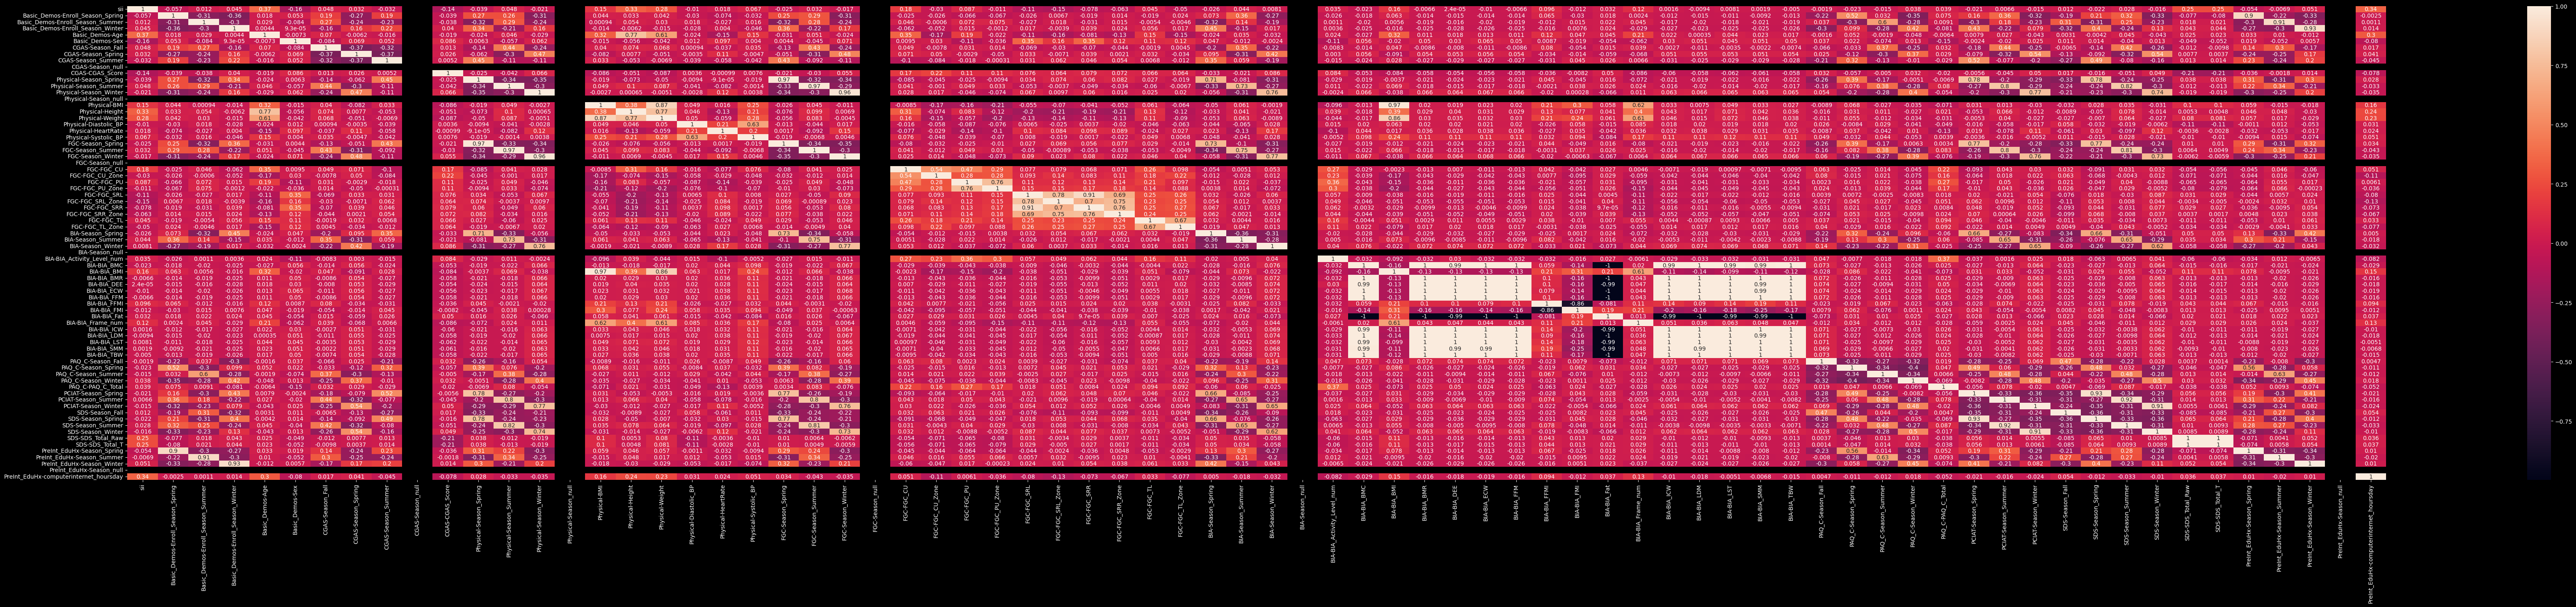

In [ ]:
corr_wo_nulls_ = data_df.corr(False, dpi=15)


# MACHINE LEARNING

## Init

In [ ]:
import polars.selectors as cs
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifier

ai_df = data_df.dataframe.select(pl.exclude(data_df.index_col))
# .filter(    pl.col("ResultadoDeLaLlamada").is_in(["CU+", "CU-", "CNU"]))

# prueba.to_csv('data_selected_modelo2.csv', index=False)
# df_final = pd.read_csv("data_selected_modelo2.csv")
target = "sii"
# Features/target split
target_data = ai_df.select(pl.col(target))
display(target_data.head())

input_data = ai_df.select(cs.exclude(target))
display(input_data.head())


sii
i64
2
0
0
1
1


Basic_Demos-Enroll_Season_Spring,Basic_Demos-Enroll_Season_Summer,Basic_Demos-Enroll_Season_Winter,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season_Fall,CGAS-Season_Spring,CGAS-Season_Summer,CGAS-Season_null,CGAS-CGAS_Score,Physical-Season_Spring,Physical-Season_Summer,Physical-Season_Winter,Physical-Season_null,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season_Spring,FGC-Season_Summer,FGC-Season_Winter,FGC-Season_null,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season_Spring,BIA-Season_Summer,BIA-Season_Winter,BIA-Season_null,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season_Fall,PAQ_C-Season_Spring,PAQ_C-Season_Summer,PAQ_C-Season_Winter,PAQ_C-PAQ_C_Total,PCIAT-Season_Spring,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,PreInt_EduHx-Season_null,PreInt_EduHx-computerinternet_hoursday
u8,u8,u8,i64,i64,u8,u8,u8,u8,i64,u8,u8,u8,u8,f64,f64,f64,i64,i64,i64,u8,u8,u8,u8,i64,i64,i64,i64,f64,i64,f64,i64,f64,i64,u8,u8,u8,u8,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,u8,u8,u8,u8,f64,u8,u8,u8,u8,u8,u8,u8,i64,i64,u8,u8,u8,u8,i64
0,0,0,5,0,0,0,0,0,51,0,0,0,0,16.877316,46.0,50.8,null,null,null,0,0,0,0,0,0,0,0,7.0,0,6.0,0,6.0,1,0,0,0,0,2,2.66855,16.8792,932.498,1492.0,8.25598,41.5862,13.8177,3.06143,9.21377,1,24.4349,8.89536,38.9177,19.5413,32.6909,0,0,0,0,null,0,0,0,0,0,0,0,null,null,0,0,0,0,3
0,1,0,9,0,0,0,0,1,null,0,0,0,0,14.03559,48.0,46.0,75,70,122,0,0,0,0,3,0,5,0,11.0,1,11.0,1,3.0,0,0,0,1,0,2,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1,21.0352,14.974,39.4497,15.4107,27.0552,1,0,0,0,2.34,0,0,0,1,0,0,0,46,64,0,1,0,0,0
0,1,0,10,1,1,0,0,0,71,0,0,0,0,16.648696,56.5,75.6,65,94,117,0,0,0,0,20,1,7,1,10.0,1,10.0,1,5.0,0,0,0,0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,1,0,2.17,0,0,0,1,0,0,0,38,54,0,1,0,0,2
0,0,1,9,0,1,0,0,0,71,0,1,0,0,18.292347,56.0,81.6,60,97,117,0,1,0,0,18,1,5,0,7.0,0,7.0,0,7.0,1,0,1,0,0,3,3.84191,18.2943,1131.43,1923.44,15.5925,62.7757,14.074,4.22033,18.8243,2,30.4041,16.779,58.9338,26.4798,45.9966,0,0,0,1,2.451,0,1,0,0,0,1,0,31,45,0,0,1,0,0
1,0,0,13,1,0,0,0,0,50,0,1,0,0,22.279952,59.5,112.2,60,73,102,0,1,0,0,12,0,6,0,10.0,1,11.0,1,8.0,0,0,1,0,0,2,4.33036,30.1865,1330.97,1996.45,30.2124,84.0285,16.6877,13.4988,67.9715,2,32.9141,20.902,79.6982,35.3804,63.1265,0,1,0,0,4.11,0,1,0,0,0,1,0,40,56,1,0,0,0,0


## Features importance

In [ ]:
# Standarize the data to improve the regression's performance

# Define the model
import time
from collections.abc import Callable
from functools import wraps


def calc_time[**Args, R](func: Callable[Args, R]) -> Callable[Args, R]:
    @wraps(func)
    def wrapper(*args: Args.args, **kwargs: Args.kwargs) -> R:
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time} seconds")
        return result

    return wrapper


def feature_importances_calc(X, y) -> None:
    model = RandomForestClassifier(n_jobs=-1)

    # Fit the model
    calc_time(model.fit)(X, y.to_numpy().ravel())

    # Obtener las importancias de las características
    importances = model.feature_importances_

    # Crear un DataFrame para mostrar la importancia de cada característica
    feature_importances = pl.DataFrame({
        "Feature": X.columns,
        "Importance": importances,
    }).sort(
        by="Importance",
        descending=True,
    )

    display(feature_importances)


print("All Features:")
feature_importances_calc(input_data, target_data)


All Features:
Execution time: 0.8008365631103516 seconds


Feature,Importance
str,f64
"""SDS-SDS_Total_Raw""",0.04466
"""SDS-SDS_Total_T""",0.04392
"""Basic_Demos-Age""",0.043208
"""Physical-Height""",0.03985
"""Physical-Weight""",0.037044
…,…
"""BIA-Season_Spring""",0.002341
"""BIA-Season_Winter""",0.002167
"""Physical-Season_null""",0.001587


## RandomForest

In [ ]:
from numpy import ndarray
from sklearn.model_selection import train_test_split

# Train test split
print("Train test split")
data_split: tuple[pl.DataFrame, pl.DataFrame, ndarray, ndarray] = train_test_split(  # type: ignore
    input_data.select(sorted(input_data.columns)),
    target_data.to_numpy().ravel(),
    test_size=0.2,
    random_state=42,
    shuffle=True,
)
input_train, input_test, target_train, target_test = data_split
print(f"X_train shape: {input_train.shape}")
print(f"X_test  shape: {input_test.shape}")
display(
    pl.Series(name="cats", values=target_train)
    .value_counts()
    .sort(by="count")
    .plot.bar(x="cats", y="count")
)


Train test split
X_train shape: (2188, 73)
X_test  shape: (548, 73)


alt.Chart(...)

## Predictions analysis

* Confusion matrix and testing metrics
* Output probabilities distribution
* Feature importances using different criteria

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       1, 2, 2, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 3, 2, 0, 0, 0,
       2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,

numpy.ndarray

FULL Data     [0 1 2 3]

Model to classify [ 0 | 1 | 2 | 3 ]
Start training the model
Execution time: 0.40103745460510254 seconds
Model Predictions
Accuracy:  0.6167883211678832
Fbeta score:  0.5494977091171407
Recall score:  0.6167883211678832
Precision score:  0.5508561616752734


/home/mili/Documentos/Programacion/MIOTI/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


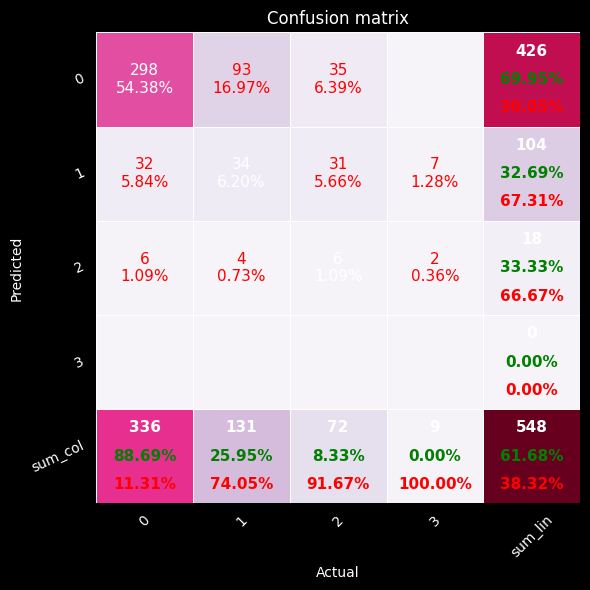

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pretty_confusion_matrix import pp_matrix_from_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    RocCurveDisplay,
    accuracy_score,
    fbeta_score,
    precision_score,
    recall_score,
)

display(target_test)
display(type(target_test))


def train_rnd_forest(X_train, y_train) -> RandomForestClassifier:
    print("Start training the model")
    model = RandomForestClassifier(
        n_estimators=25,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1,
    )
    model.fit(X_train, y_train)
    return model


def print_metrics(
    model: RandomForestClassifier,
    input_test: pl.DataFrame,
    target_test: ndarray,
) -> None:
    print("Model Predictions")
    predictions = model.predict(input_test)

    print("Accuracy: ", accuracy_score(target_test, predictions))
    print("Fbeta score: ", fbeta_score(target_test, predictions, beta=0.5, average="weighted"))
    print("Recall score: ", recall_score(target_test, predictions, average="weighted"))
    print("Precision score: ", precision_score(target_test, predictions, average="weighted"))

    figsize = len(model.classes_) + 2
    pp_matrix_from_data(
        target_test,
        predictions,
        columns=model.classes_.tolist(),
        cmap="PuRd",
        figsize=(figsize, figsize),
    )
    if len(model.classes_) == 2:
        RocCurveDisplay.from_estimator(
            model,
            input_test,
            target_test,
            pos_label=model.classes_[0],
        )
        plt.show()
        print()


def model_analisys(
    input_train: pl.DataFrame,
    target_train: ndarray,
    input_test: pl.DataFrame,
    target_test: ndarray,
    labels: list | None = None,
    model: RandomForestClassifier | None = None,
) -> tuple[RandomForestClassifier, tuple[ndarray, ndarray]]:
    data_train = target_train
    data_test = target_test

    if labels:
        others_labels = np.unique(target_train).tolist()

        correct_label = ",".join(map(str, labels))
        other_label = ",".join([label for label in others_labels if label not in labels])
        other_label = "Other" if len(other_label) > len(correct_label) * 1.5 else other_label

        conversor = np.vectorize(lambda x: correct_label if x in labels else other_label)
        data_train = conversor(data_train)
        data_test = conversor(data_test)

    labels = [str(label) for label in np.unique(data_train).tolist()]

    print(f"Model to classify [ {" | ".join(labels)} ]")
    if model is None:
        # model = train_rnd_forest(input_train, data_train)
        model = calc_time(train_rnd_forest)(input_train, data_train)
    print_metrics(model, input_test, data_test)
    return model, (data_train, data_test)


print("FULL Data    ", np.unique(target_train))
print()

# full category model
model, (data_train, data_test) = model_analisys(
    input_train,
    target_train,
    input_test,
    target_test,
)


Feature,Importance
str,f64
"""Physical-Height""",0.054333
"""Basic_Demos-Age""",0.050654
"""Physical-Weight""",0.0463
"""SDS-SDS_Total_Raw""",0.043846
"""SDS-SDS_Total_T""",0.041017
…,…
"""BIA-Season_null""",0.001823
"""FGC-Season_null""",0.001635
"""BIA-Season_Winter""",0.001615


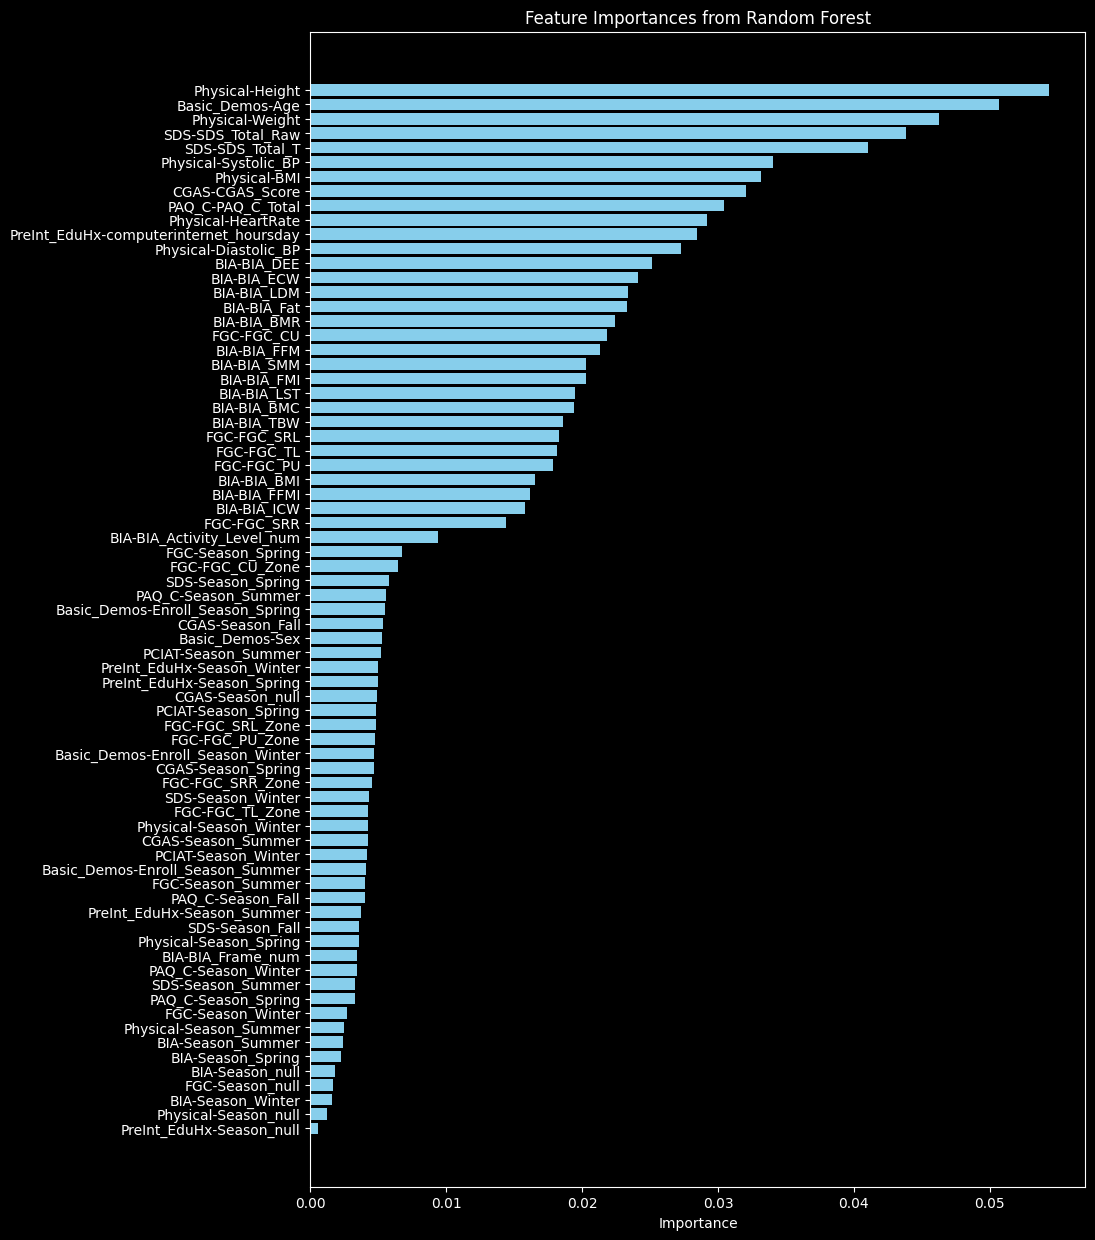

In [ ]:
importances = model.feature_importances_

# Si tus datos tienen nombres de columnas (por ejemplo, si estás usando un DataFrame de pandas)
# De lo contrario, puedes usar una lista con los nombres de las características
features = input_train.columns

# Crear un DataFrame con las características y sus importancias
feature_importances = pl.DataFrame({"Feature": features, "Importance": importances})

# Ordenar por importancia
feature_importances = feature_importances.sort(by="Importance", descending=True)

# Mostrar el DataFrame
display(feature_importances)

# Graficar las importancias de las características
plt.figure(figsize=(10, 15))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Para que las características más importantes estén en la parte superior
plt.show()


## Cross Validation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

if True:
    # Definir el modelo de Random Forest
    rf_model = RandomForestClassifier(class_weight="balanced_subsample", random_state=42, n_jobs=-1)

    # Definir el número de folds para la validación cruzada (por ejemplo, 5)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Realizar la validación cruzada usando 'accuracy' como métrica
    print("Iniciando validación cruzada")
    print("---------------------------")

    cv_scores = cross_val_score(
        rf_model,
        input_train,
        target_train,
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1,
    )
    # Mostrar los resultados
    print(f"Resultados de cada fold: {cv_scores}")
    print(f"Media de accuracy: {np.mean(cv_scores):.2f}")
    print(f"Desviación estándar de accuracy: {np.std(cv_scores):.2f}")

    print("---------------------------")
    print()

    # Comparar la media con el rendimiento en el conjunto de prueba
    print("Comparando con el conjunto de prueba")
    print("---------------------------")

    rf_model.fit(input_train, data_train)
    test_score = rf_model.score(input_test.select(sorted(input_test.columns)), data_test)
    print(f"Accuracy en el conjunto de prueba: {test_score:.2f}")

    print("---------------------------")


Iniciando validación cruzada
---------------------------
Resultados de cada fold: [0.58219178 0.58675799 0.57305936 0.60411899 0.57208238]
Media de accuracy: 0.58
Desviación estándar de accuracy: 0.01
---------------------------

Comparando con el conjunto de prueba
---------------------------
Accuracy en el conjunto de prueba: 0.62
---------------------------
